# Lab 2

The **purpose** of this lab is to use the tools we've learned in Python to implement a 
simple machine learning algorithm.

- In this lab, there is (simulated) data on Pichus' and Pikachus' lengths and widths.
- We should create an algorithm that based on the given data, can determine whether a new data point should be classified as **Pichu**
or **Pikachu**.
- We should follow this flowchart to build the basic algorithm:
    - Step 1. Read the data and save it in an appropriate data structure
    - Step 2. Plot all the points (each class gets a color) in the same window
    - Step 3. Read in the test points
    - Step 4. Calculate the distance between the test point and training points
    - Step 5. Which class is the point closest to?
        - Classify the test point as **Pichu**
        - Classify the test point as **Pikachu**
- Task 1:
    - Let the user input a test point and have the algorithm determine which Pokémon it is.
    - Include error handling that takes care of negative numbers and non-numeric inputs.
    - Make sure to have user-friendly error messages.
<br/><br/>
- Task 2:
    - The approach we've used with the nearest point can classify incorrectly when points for each Pokémon overlap.
    - Now we should instead choose the 10 nearest points to our test points.
    - The Pokémon to which the test points belong is determined by majority in the nearest 10 points.
<br/><br/>
- Task 3:
    - Shuffle the original data so that:
    - 100 are training data (50 Pikachu, 50 Pichu)
    - 50 are test data (25 Pikachu, 25 Pichu)
<br/><br/>
- Task 4:
    - Calculate the accuracy using this formula:
    - Accuracy = (TP + TN)/(total) where:
<br/><br/>
        |                  | Pikachu actual | Pichu actual  |
        |------------------|----------------|---------------|
        | Pikachu predicted| TP             | FP            |
        | Pichu predicted  | FN             | TN            |

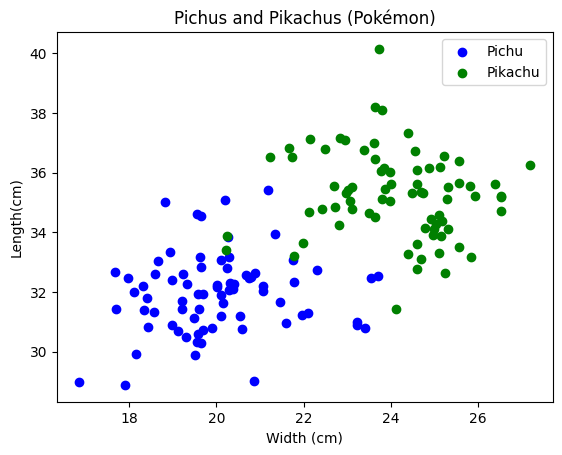

In [1]:
import matplotlib.pyplot as plt
import csv

# 3 empty lists, one for for the pokemon's width, one for its length, and one that indicates the class of the Pokémon (0 = Pichu, 1 = Pikachu)

pokemon_width = []
pokemon_length = []
pichu_or_pikachu = []

# Step 1 - Read the data and save it in an appropriate data structure

with open("datapoints.txt", "r") as file:
    reader = csv.DictReader(file)
    
    # NOTE:
    # In the .txt files the rows are:
    # (width (cm), height (cm), label (0-pichu, 1-pikachu)
    # There's an accidental comma separation between "0-pichu" and "1-pikachu", essentially creating an empty row. 
    # This means that the rows are:
    
    # First row = "(width (cm)"
    # Second row = " height (cm)" <--- note the space before "height (cm)"
    # Third row = " label (0-pichu" <--- note the space before "label" and that the third row ends before the accidental comma
    
    for row in reader:
        pokemon_width.append(float(row["(width (cm)"]))
        pokemon_length.append(float(row[" height (cm)"]))
        pichu_or_pikachu.append(int(row[" label (0-pichu"]))

# 4 empty lists to store width and length for Pichus and Pikachus (I separate the Pokémon lists above into lists for the individual Pokémons)

pichu_width = []
pichu_length = []
pikachu_width = []
pikachu_length = []

# Here I create two for loops to iterate through the Pichu/Pikachu lists above. 
# If it's a Pichu (0), I add the Pokémon's width and length to the Pichu lists. 
# If it's a Pikachu (1), I add the Pokémon's width and length to the Pikachu lists.

for i in range(len(pokemon_width)):
    if pichu_or_pikachu[i] == 0:
        pichu_width.append(pokemon_width[i])
    else:
        pikachu_width.append(pokemon_width[i])
        
for i in range(len(pokemon_length)):
    if pichu_or_pikachu[i] == 0:
        pichu_length.append(pokemon_length[i])
    else:
        pikachu_length.append(pokemon_length[i])

# Step 2 - Plot all the points (each class gets a color) in the same window

plt.scatter(pichu_width, pichu_length, color = "blue", label = "Pichu")
plt.scatter(pikachu_width, pikachu_length, color = "green", label = "Pikachu")

plt.title("Pichus and Pikachus (Pokémon)")
plt.xlabel("Width (cm)")
plt.ylabel("Length(cm)")
plt.legend()

plt.show()

In [2]:
# Here I create an empty list to store the test points once I've read them from the testpoints.txt file

test_points = []

# Step 3 - Read in the test points

with open("testpoints.txt", "r") as file:
    # Skip the first line ("Test points:")
    lines = file.readlines()[1:]
    
    for line in lines:
        # Remove the parentheses
        line = line.replace("(", "").replace(")", "")
        
        # Split the string by the comma
        split_line = line.split(",")
        
        # Remove the numbering ("1.", "2.", "3.", and "4.")
        x_string = split_line[0].split(" ")[-1]
        y_string = split_line[1]
        
        # Convert the strings to floats
        x = float(x_string)
        y = float(y_string)
        
        # Add the tuples to the list
        test_points.append((x, y))
        
# print(test_points)

In [3]:
import math

# Here I create a function to measure distance between points
# I use the Euclidean formula we used in an earlier exercise: 
# Distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)

def calculate_distance(point1, point2):

    # Point 1 & 2
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]

    # Distance between point 1 & 2
    distance_x = x1 - x2
    distance_y = y1 - y2

    # Euclidean formula for distance
    distance = math.sqrt(distance_x**2 + distance_y**2)

    return distance

In [4]:
# Time for the fun part!

# Empty lists where I will store the Pichu and Pikachu points
pichus = []
pikachus = []

# len(pichu_width) to get the number of Pichus, append to list
for i in range(len(pichu_width)):
    pichus.append((pichu_width[i], pichu_length[i]))

# len(pikachu_width) to get the number of Pikachus, append to list
for i in range(len(pikachu_width)):
    pikachus.append((pikachu_width[i], pikachu_length[i]))
    
# Step 4 - Calculate the distance between the test point and training points
for test_point in test_points:
    distances = []
    
    for pichu in pichus:
        pichu_distance = calculate_distance(test_point, pichu)
        distances.append((pichu_distance, "Pichu"))
    
    for pikachu in pikachus:
        pikachu_distance = calculate_distance(test_point, pikachu)
        distances.append((pikachu_distance, "Pikachu"))
    
    # Sort the list by distance (first element of each tuple)
    distances.sort()
    
    # Step 5 - Classify the Pokémons
    # The nearest point's Pokémon
    nearest_pokemon = distances[0]
    if nearest_pokemon[1] == "Pichu":
        nearest_pokemon = "Pichu"
    else:
        nearest_pokemon = "Pikachu"
    
    print(f'Sample with (width, height): {test_point} classified as {nearest_pokemon}')

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


In [5]:
# Task 1 - Classify the user's Pokémon (nearest point only)

while True:
    user_input_width = input("Please enter the width of the pokemon:")
    user_input_length = input("Please enter the length of the pokemon:")
    
    try:
        user_width = float(user_input_width)
        user_length = float(user_input_length)
        
        if user_width < 0 or user_length < 0:
            print("Please enter positive numbers only.")
        else:
            user_pokemon = user_width, user_length
            break
    except ValueError:
        print("Please enter numbers only.")

distances = []
    
for pichu in pichus:
    pichu_distance = calculate_distance(user_pokemon, pichu)
    distances.append((pichu_distance, "Pichu"))
    
for pikachu in pikachus:
    pikachu_distance = calculate_distance(user_pokemon, pikachu)
    distances.append((pikachu_distance, "Pikachu"))
    
# Sort the list by distance (first element of each tuple)
distances.sort()
    
# The nearest point's Pokémon
nearest_pokemon = distances[0]

# Check which Pokémon is closer
if nearest_pokemon[1] == "Pichu":
    nearest_pokemon = "Pichu"
else:
    nearest_pokemon = "Pikachu"
    
print(f'Sample with (width, height): {user_pokemon} classified as {nearest_pokemon}')

Sample with (width, height): (23.7, 32.5) classified as Pichu


In [6]:
# Task 2 - Classify the user's Pokémon (with the 10 nearest points)

while True:
    user_input_width = input("Please enter the width of the pokemon:")
    user_input_length = input("Please enter the length of the pokemon:")
    
    try:
        user_width = float(user_input_width)
        user_length = float(user_input_length)
        
        if user_width < 0 or user_length < 0:
            print("Please enter positive numbers only.")
        else:
            user_pokemon = user_width, user_length
            break
    except ValueError:
        print("Please enter positive digits only.")

distances = []
    
for pichu in pichus:
    pichu_distance = calculate_distance(user_pokemon, pichu)
    distances.append((pichu_distance, "Pichu"))
    
for pikachu in pikachus:
    pikachu_distance = calculate_distance(user_pokemon, pikachu)
    distances.append((pikachu_distance, "Pikachu"))
    
# Sort the list by distance (first element of each tuple)
distances.sort()
    
# Empty lists where I will add how many pichus/pikachus are in the nearest 10
pichus_in_nearest_10 = 0
pikachus_in_nearest_10 = 0

# Check which ones are nearest
for i in range(10):
    nearest_pokemon = distances[i]
    
    # Check which Pokémon is closer
    if nearest_pokemon[1] == "Pichu":
        nearest_pokemon = "Pichu"
        pichus_in_nearest_10 += 1
    else:
        nearest_pokemon = "Pikachu"
        pikachus_in_nearest_10 += 1

# Print the classification
if pichus_in_nearest_10 > pikachus_in_nearest_10:
    print(f'Sample with (width, height): {user_pokemon} classified as Pichu')
else:
    print(f'Sample with (width, height): {user_pokemon} classified as Pikachu')


Sample with (width, height): (23.7, 32.5) classified as Pikachu


To determine if the new algorithm worked I tried to find a point which was closer to a Pichu, but more likely to be a Pikachu. In the dataset there's a Pichu with the dimensions:

- 23.6967469082275, 32.52744160379351 - approximately **(23.7, 32.5)**

This is an outlier, a statistically unlikely size for a Pichu in this dataset (see the scatter plot). 

- With only one point, the algorithm classified (23.7, 32.5) as **Pichu**
- With the 10 nearest points it classified (23.7, 32.5) as **Pikachu**. 

### **Mission Accomplished!**

In [14]:
# Task 3 - Shuffle the original data so that:
# 100 are training data (50 Pikachu, 50 Pichu)
# 50 are test data (25 Pikachu, 25 Pichu)

import random

new_pichu_training_data = []
new_pikachu_training_data = []
new_pichu_test_data = []
new_pikachu_test_data = []

# Shuffle the original Pichus and Pikachus
random.shuffle(pichus)
random.shuffle(pikachus)

# Append Pichus to new training data and test data
for pichu in pichus:
    if len(new_pichu_training_data) < 50:
        new_pichu_training_data.append(pichu)
    else:
        new_pichu_test_data.append(pichu)

# Append Pikachus to new training data and test data
for pikachu in pikachus:
    if len(new_pikachu_training_data) < 50:
        new_pikachu_training_data.append(pikachu)
    else:
        new_pikachu_test_data.append(pikachu)

# # Below I tested the code to make sure it works as intended. 
# # I've commented it out to make the code cleaner, but feel free to check it for yourself!

# print(f'Number of Pichus in the new training set = {len(new_pichu_training_data)}')
# print(f'Number of Pichus in the new test set = {len(new_pichu_test_data)}')

# # Check if the total number of Pichus is 75 (To make sure all Pichus from the original dataset has been used)
# if len(new_pichu_training_data) + len(new_pichu_test_data) == 75:
#    print("All Pichus are included in the new datasets.")

# print()

# print(f'Number of Pikachus in the new training set = {len(new_pikachu_training_data)}')
# print(f'Number of Pikachus in the new test set = {len(new_pikachu_test_data)}')

# # Check if the total number of Pikachus is 75 (To make sure all Pikachus from the original dataset has been used)
# if len(new_pikachu_training_data) + len(new_pikachu_test_data) == 75:
#    print("All Pikachus are included in the new datasets.")

# print()

# # Check if the randomizer works to add random Pichus & Pikachus to the new training & test data
# # It works if the elements are different each time you run the program
# print(new_pichu_training_data)
# print(new_pikachu_training_data)

In [8]:
# Task 4 - Calculate the accuracy using this formula:
# Accuracy = (TP + TN)/(total)

# Function to classify a point based on the 10 nearest points (reusing much of code from above)

def classify_10_nearest(test_point, pichus, pikachus):
    distances = []
        
    for pichu in pichus:
        pichu_distance = calculate_distance(test_point, pichu)
        distances.append((pichu_distance, "Pichu"))
        
    for pikachu in pikachus:
        pikachu_distance = calculate_distance(test_point, pikachu)
        distances.append((pikachu_distance, "Pikachu"))
        
    # Sort the list by distance (first element of each tuple)
    distances.sort()
        
    # Empty lists where I will add how many pichus/pikachus are in the nearest 10
    pichus_in_nearest_10 = 0
    pikachus_in_nearest_10 = 0

    # Check which ones are nearest
    for i in range(10):   
        nearest_pokemon = distances[i]
        
        # Check which Pokémon is closer
        if nearest_pokemon[1] == "Pichu":
            pichus_in_nearest_10 += 1
        else:
            pikachus_in_nearest_10 += 1

    # Find which Pokémon is represents the majority in the 10 nearest points
    if pichus_in_nearest_10 > pikachus_in_nearest_10:
        return "Pichu"
    else:
        return "Pikachu"

# Lists to store merged data
merged_training_data = []
merged_test_data = []

# Merge new training data
for point in new_pichu_training_data:
    merged_training_data.append((point, "Pichu"))
for point in new_pikachu_training_data:
    merged_training_data.append((point, "Pikachu"))

# Merge new test data
for point in new_pichu_test_data:
    merged_test_data.append((point, "Pichu"))
for point in new_pikachu_test_data:
    merged_test_data.append((point, "Pikachu"))

# Pichus & Pikachus lists for the new training data
pichus = []
pikachus = []

for point, label in merged_training_data:
    if label == "Pichu":
        pichus.append(point)
    elif label == "Pikachu":
        pikachus.append(point)

TP = 0
TN = 0
FP = 0
FN = 0

# For loop to classify each test point and update counts (TP, TN, FP, FN)
for point, actual_label in merged_test_data:
    predicted_label = classify_10_nearest(point, pichus, pikachus)
    
    if actual_label == "Pikachu":
        if predicted_label == "Pikachu":
            TP += 1
        else:
            FN += 1
    else:
        if predicted_label == "Pichu":
            TN += 1
        else:
            FP += 1
    
    
total = TP + TN + FP + FN
accuracy = (TP + TN) / total  
    
print(f"The accuracy of this model is {accuracy}")


The accuracy of this model is 0.98


Results after repeating step 3 & 4 ten times:

- Result 1: Accuracy = 0.94
- Result 2: Accuracy = 0.92
- Result 3: Accuracy = 0.94
- Result 4: Accuracy = 0.96
- Result 5: Accuracy = 0.94
- Result 6: Accuracy = 0.92
- Result 7: Accuracy = 0.96
- Result 8: Accuracy = 0.94
- Result 9: Accuracy = 0.90
- Result 10: Accuracy = 0.98

*Note:* Each result is an even number, which is quite curious. I don't know if this is because of the data itself, an error somewhere in the code I can't find, too small dataset, or just random chance. 

The average accuracy is 0.94


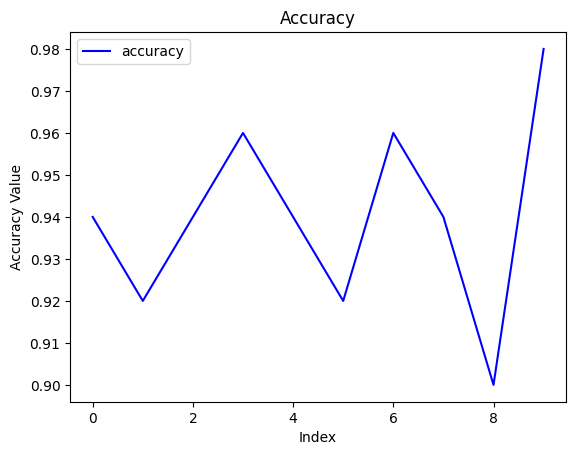

In [11]:
# Plotting the accuracy
results = [0.94, 0.92, 0.94, 0.96, 0.94, 0.92, 0.96, 0.94, 0.90, 0.98]
total_result = 0

for result in results:
    total_result += result
    
average_accuracy = total_result/len(results)
print(f'The average accuracy is {average_accuracy:.2f}')

plt.plot(range(len(results)), results, color = "blue", label = "accuracy")

plt.title("Accuracy")
plt.xlabel("Index")
plt.ylabel("Accuracy Value")
plt.legend()

plt.show()

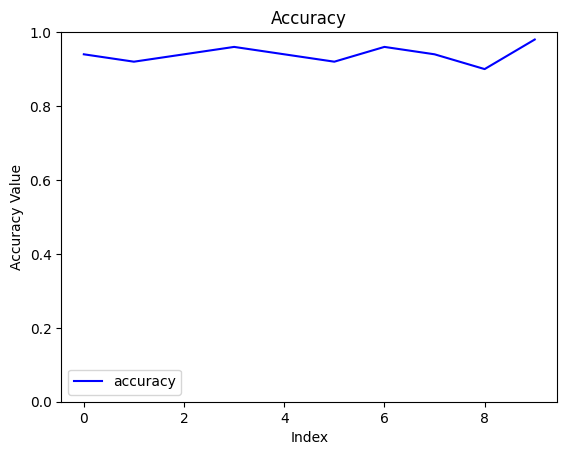

In [12]:
# The graph above made it seem as though the result fluctuates heavily, which isn't necessarily the case
# I felt that it was a bit deceiving so I made a new one with different scales (same data)

plt.plot(range(len(results)), results, color = "blue", label = "accuracy")

plt.title("Accuracy")
plt.xlabel("Index")
plt.ylabel("Accuracy Value")
plt.legend()
plt.ylim(0.0, 1.0)

plt.show()